In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

# Comparing Updated Analysis Gen Matching
## Previous analysis gen matching did not always choose the smallest separated objects
## New method is pairs based on the smallest possible pair (recursive algo)

In [3]:
old_trees = ObjIter([Tree(fn) for fn in fc.eightb.oldsetup.accstudies.raw_with_pu.signal_list[::3]])

100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


In [4]:
new_trees = ObjIter([Tree(fn, use_gen=True) for fn in fc.eightb.accstudies.raw_with_pu.signal_list[::3]])

100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


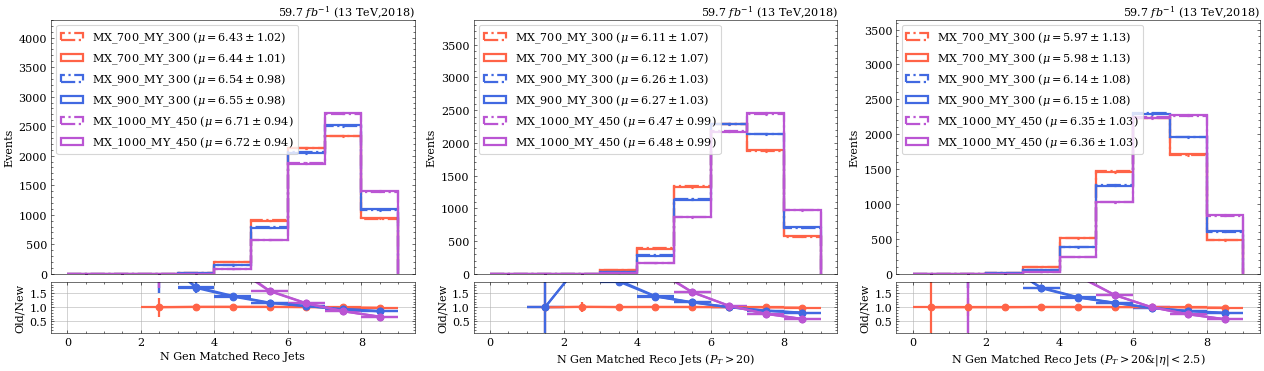

In [20]:
study.quick(
    (old_trees+new_trees)[::3] + (old_trees+new_trees)[1::3] + (old_trees+new_trees)[2::3], 
    legend=True, legend_frameon=True, h_label_stat='mean_stdv',
    h_linestyle=['-.',None]*len(old_trees),
    varlist=['nfound_all', lambda t : ak.sum( t.jet_signalId[t.jet_pt > 20]>-1, axis=-1 ), lambda t : ak.sum( t.jet_signalId[(np.abs(t.jet_eta)<2.5)&(t.jet_pt > 20)]>-1, axis=-1 )],
    xlabels=['N Gen Matched Reco Jets','N Gen Matched Reco Jets ($P_{T}>20$)','N Gen Matched Reco Jets ($P_{T}>20 & |\eta|<2.5$)'],
    dim=-1,
    ratio=True, r_ylabel='Old/New',
)

# Conclusions

## New algorithm is indeed matching more gen level quarks successfully
## It is a small difference, accounting for about 0.01 more quarks matched on average
## Consitent for different cuts on reco jets as well